# Program 3: Quick Select
### Wesley Jochman, Cody Morrow, Caleb Andreano

The selection problem takes a sequence of $n \geq 2$ numbers and and integer $k$, $1 \leq k \leq n$ and returns the $k^{th}$ smallest element in the sequence. 

The problem is solved using a divide and conquer approach. For each iteration, a pivot value is chosen randomly from the target array. The array is then partitioned into three arrays based on the pivot:
- The `left` array will contain all values strictly less than the pivot
- The `same` array will contain all values equal to the pivot
- The `right` array will contain all values strictly greater than the pivot. 

At this point, if $k$ is less than the length of the `left` array, we know that the $k^{th}$ smallest element must be in this array. In this case, we recurse using only the `left` array. 

If $k$ is equal to the length of the `left` array plus one, we know that the $k^{th}$ element is *not* in the left array. Since the `right` array contains every element that is strictly greater than the pivot, we now know that the $k^{th}$ smalles element is equal to the pivot. Therefore, we've found the target, so return the pivot. 

Otherwise, we know that the $k^{th}$ smalles element *must* be in the right array. We recurse on the right array, decementing $k$ by the length of the left arrayn as well as decementing $k$ by the number of values found that are identical to the pivots, or the length of the `same` array. 

In pseudocode, 
```
function quick_select(A, k):
    pivot = A[random(0, len(A))]

    left, same, right = partition(A, pivot)

    if k <= len(left):
        return quick_select(left, k)
    else if k == len(left) + 1:
        return pivot
    else:
        return quick_select(right, k - len(left) - len(same))

function partition(A, pivot):
    left, same, right = [], [], []
    for n in A:
        if n < pivot:
            left += n
        else if n < pivot:
            right += n
        else 
            same += n
    
    return (left, same, right)
```

## Time complexity
Examining the algorithm, split the process into:
1. $D(n)$, the time complexity of the *divide* step,
2. $aT(\frac{n}{b})$ for constants $a, b \in \mathbb{R}^+$, or the time complexity of the *conquer* step, and
3. $C(n)$, the time complexity of the *combine* step. 

The *divide* step is implemented through the `partition` subroutine. It's trivial to see that $D(n)\in O(n)$, as the function iterates once through a single array. Performing exact analysis, we obtain:
$$
\begin{align}
D(n) &= 3+n(1 + \hat{b} + (1-\hat{b})(1+\hat{c} + (1-\hat{c}))) \\
&= 2 + 3n - \hat{b}n
\end{align}
$$
where 
$$
\hat{b} = \begin{cases} 
1 & \text{ num } < \text{ pivot } \\
0 & \text{ otherwise }
\end{cases}
$$
and 
$$
\hat{c} = \begin{cases}
1 & \text{ num } > \text{ pivot } \\
0 & \text{ otherwise }
\end{cases}
$$

For this particular problem, we have the following assumption: "You may assume that the random pivot divides the elements in half each time". Therefore, we express the recurrence portion as $(a)T(\frac{n}{2})$, with $a=1$ as only one subproblem is computed out of the two partitions. 

Finally, performing exact analysis given $D(n)3+n(1 + \hat{b} + (1-\hat{b})(1+\hat{c}))$ and $aT\left( \frac{n}{b} \right) = T(\frac{n}{2})$, we find the following for our final algorithm:
$$
\begin{align} 
T(n) &= 1 + \hat{d} + (1-\hat{d})(1+\hat{e}) + 2 +3 + n(2 + \hat{c} - \hat{b}\hat{c}) + T\left( \frac{n}{2} \right) \\
\end{align}
$$
where 
$$
\hat{d} = \begin{cases}
1 & \text{n }  = 1 \\
0 & \text{ otherwise }
\end{cases}
$$
and 
$$
\hat{e} = \begin{cases}
0 & 1 \leq \text{ k } \leq n \\
1 & \text{otherwise}
\end{cases}
$$

Simplifying for worst possible cases, i.e. $\hat{b}=0$, $\hat{d} = 0$, and $\hat{e} = 1$, we find:
$$
T(n) \leq T\left(\frac{n}{2}\right)+3n+8
$$
## Closed Form
For $T(n)$, 
- $a=1$
- $b=2$
- $f(n) = 3n+8$
- $n^{\log _{b} a} = n^0 = 1$

Choose $\epsilon=1$, and assume: 
$$
3n+8 \in \Omega(n^{0+1}) \to f(n) \in \Omega(n)
$$
It follows that
$$
cn \le 3n+8
$$
Set $c=1$:
$$
\begin{align}
n &\le 3n+8 \\
1 &\le 3 + \frac{8}{n} \\
\lim_{ n \to \infty }& \left( 1 \le 3 + \frac{8}{n} \right) = 1 \le 3
\end{align}
$$
This is true for sufficiently large $n$ (really all $n$).  

Next, choose $\delta = \frac{2}{3}$. 
$$
\begin{align}
af\left( \frac{n}{b} \right) = \frac{3}{2}n+8 &\leq  \delta (3n+8) \leq 2n + \frac{16}{3} \\
3n+16 &\leq 4n + \frac{32}{3} \\
3 + \frac{16}{n} &\leq 4+\frac{32}{3n} \\
\lim_{ n \to \infty } &= 3 \leq 4
\end{align}
$$
This is true for sufficiently large $n$. 

So, there exists $\epsilon > 0$ and $\delta <1$ such that $f(n)\in \Omega(n^{\log_{b} a+\epsilon})$ and $af(\frac{n}{b}) \leq \delta f(n)$ for sufficiently large $n$.  Therefore, $T(n)\in \Theta(f(n))$, so $T(n) \in \Theta(n)$.




## Correctness
Our algorithm is correct for the solution to this problem because it will split the list to have less values than it would otherwise have. This fits the criteria to have a split find algorithm that will find the target value while seperating the given array till the last value to be checked is the proper element.
Our solution achieves this by taking the first index of the list and checking if each following index is larger or smaller that then current index. when the value is smaller it goes in one list, but if it's bigger it goes to a different list. This achieves the split find because it will find if the smaller value list contains the target index and then it uses which ever list will hold the value. This solution follows the algorithm needed which means that we follow what is wanted so our solution is correct.

## Tests

In [1]:
import random
from quick_select import quick_select


def test_quick_select_single_element():
    array = [5]
    k = 1
    assert quick_select(array, k) == 5
    print("Single element test passed.")


def test_quick_select_multiple_elements():
    array = [9, 3, 7, 1, 5]
    k = 3
    assert quick_select(array, k) == 5
    print("Multiple elements test passed.")


def test_quick_select_negative_numbers():
    array = [-5, -3, -7, -1, -9]
    k = 2
    assert quick_select(array, k) == -7
    print("Negative numbers test passed.")


def test_quick_select_random_elements():
    array = random.sample(range(1, 101), 10)
    k = 7
    assert quick_select(array, k) == sorted(array)[k - 1]
    print("Random elements test passed.")

def test_homogeneous():
    array = [10, 10, 10, 10, 10, 10, 10, 10]
    k = 1
    assert quick_select(array, k) == sorted(array)[k - 1]
    print("Homogeneous test passed.")

def main():
    test_quick_select_single_element()
    test_quick_select_multiple_elements()
    test_quick_select_negative_numbers()
    test_quick_select_random_elements()
    test_homogeneous()
    print("All tests passed.")

if __name__ == "__main__":
    main()

Single element test passed.
Multiple elements test passed.
Negative numbers test passed.
Random elements test passed.
Homogeneous test passed.
All tests passed.


## Benchmarking

In [2]:
%pip install numpy
%pip install matplotlib
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\wjoch\appdata\local\programs\python\python312\lib\site-packages (3.8.3)




[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
from enum import Enum
from random import randint
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import time
class Ordering(Enum):
    Unsorted = 1
    Sorted = 2
    RevSorted = 3

def benchmark(algorithm, input_list, k):
    start_time = time.perf_counter()
    algorithm(input_list, k)
    end_time = time.perf_counter()
    elapsed = end_time - start_time
    return elapsed

def benchmark_sorting(algorithm, input_list, k):
    start_time = time.perf_counter()
    algorithm(input_list)[k - 1]
    end_time = time.perf_counter()
    elapsed = end_time - start_time
    return elapsed

def generate_list(ordering, length):
    l = [None] * length
    match ordering:
        case Ordering.Unsorted:
            l = [random.choice(range(length*10)) for _ in range(length)]
        case Ordering.Sorted:
            l = sorted([random.choice(range(length*10)) for _ in range(length)])
        case Ordering.RevSorted:
            l= sorted([random.choice(range(length*10)) for _ in range(length)], reverse=True)
    return l

def generate_k(list_length):
    return randint(1, list_length - 1)

list_sizes = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

In [39]:
lists = []
ks = []
print('| List | k |')
for size in list_sizes:
    list = generate_list(Ordering.Unsorted, size)
    lists.append(list)
    k = generate_k(size)
    ks.append(k)
    print(f'| {list} | {k} |')

| List | k |
| [16, 11, 30, 47, 30] | 2 |
| [91, 90, 55, 63, 94, 9, 17, 84, 92, 36] | 5 |
| [18, 52, 53, 108, 2, 28, 84, 84, 50, 88, 22, 116, 71, 59, 100] | 13 |
| [32, 168, 41, 55, 70, 101, 83, 1, 147, 187, 183, 48, 155, 13, 155, 105, 49, 0, 51, 36] | 9 |
| [219, 248, 11, 201, 184, 240, 223, 137, 174, 126, 220, 3, 20, 32, 32, 14, 134, 15, 37, 141, 230, 32, 215, 222, 114] | 22 |
| [84, 219, 60, 231, 20, 223, 233, 116, 62, 211, 61, 252, 283, 119, 18, 57, 272, 22, 197, 176, 135, 222, 17, 193, 132, 198, 294, 175, 6, 89] | 10 |
| [85, 251, 233, 193, 178, 305, 207, 213, 81, 7, 6, 189, 300, 79, 286, 143, 140, 99, 47, 26, 97, 221, 333, 54, 249, 208, 17, 198, 225, 73, 265, 328, 265, 163, 219] | 16 |
| [106, 226, 91, 25, 326, 234, 235, 274, 266, 355, 230, 266, 292, 5, 364, 213, 278, 213, 378, 68, 124, 41, 349, 318, 375, 149, 235, 342, 15, 145, 48, 78, 349, 277, 63, 374, 306, 115, 372, 240] | 38 |
| [358, 16, 132, 326, 392, 127, 390, 335, 350, 124, 241, 292, 89, 21, 58, 59, 110, 274, 104, 224, 8

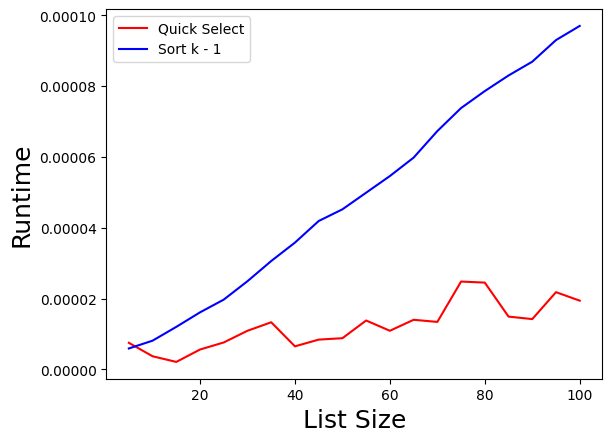

In [50]:
from merge_sort import merge_sort
from quick_select import quick_select

our_times = []
sorted_times = []
for i in range(len(lists)):
    our_times.append(benchmark(quick_select, lists[i], ks[i]))
    sorted_times.append(benchmark_sorting(merge_sort, lists[i], ks[i]))

plt.plot(list_sizes, our_times, color='red', label='Quick Select')
plt.plot(list_sizes, sorted_times, color='blue', label='Sort k - 1')
plt.xlabel("List Size", fontsize=18)
plt.ylabel("Runtime", fontsize=18)
plt.legend()